# **Instrument to Instrument (ITI) translation: STEREO far side magnetograms**


## Read The Docs
For more information about the tool and background of the individual case studies see:

[iti-documentation.rtfd.io](https://iti-documentation.readthedocs.io/en/latest/)

ITI translates between image domains and can be used to approximate missing observables with the use of proxy data. In this application we estimate magnetograms from STEREO EUV filtergrams.

We only consider the absolute magnetic flux, since the magnetic polarity is arbitrary when considering local patches of EUV images.

We use the same STEREO EUV observations as for the STEREO-to-SDO application, but use the STEREOToSDOMagnetogram translator to also obtain the magnetograms.

## Installation

In [1]:
!pip install git+https://github.com/spaceml-org/InstrumentToInstrument.git@development
!pip install lightning
!pip install sunpy_soar
!pip install sunpy

  Cloning https://github.com/spaceml-org/InstrumentToInstrument.git (to revision development) to /private/var/folders/tj/7h3lqn950sv5k36g1yyl4vkr0000gn/T/pip-req-build-qdz9t1np
  Running command git clone --filter=blob:none --quiet https://github.com/spaceml-org/InstrumentToInstrument.git /private/var/folders/tj/7h3lqn950sv5k36g1yyl4vkr0000gn/T/pip-req-build-qdz9t1np
  Running command git checkout -b development --track origin/development
  Switched to a new branch 'development'
  Branch 'development' set up to track remote branch 'development' from 'origin'.
  Resolved https://github.com/spaceml-org/InstrumentToInstrument.git to commit b083c705d463997caebf2df663d8774cbe569eda
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1

## Imports

In [2]:
from iti.translate import *
import glob
from matplotlib.colors import Normalize
from iti.evaluation.util import download_gcp_bucket
from datetime import datetime
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord
import warnings
warnings.filterwarnings('ignore')

base_path = os.getcwd()

## Download data

SOHO and EIT files requires a pre-processing that is only available in SSWIDL. We provide a sample observation from each Instrument. If you want to make use of custom files, use the prep routines and upload your files.

We provide a publicly available dataset which allows the users to play around with a subset of the data available without downloading the entire database.

This dataset contains ``.fits`` files from **PROBA2/SWAP**, **SDO/AIA**, **Solar Orbiter/EUI (FSI and HRI)**, **SOHO/EIT** and **STEREO/EUVI**.

In addition 3 trained models are stored with:
1. PROBA2/SWAP to SDO/AIA
2. Solar Orbiter/EUI FSI to SDO/AIA and
3. SDO/AIA to Solar Orbiter/EUI HRI

to perform the translation.  

In [3]:
download_gcp_bucket('iti-dataset', base_path+'/iti-testset')

Failed to download configs/ due to exception: [Errno 21] Is a directory: '/Users/christophschirninger/PycharmProjects/ITI/examples/iti-testset/configs/'
Downloaded configs/proba2_to_sdo_colab.yaml to /Users/christophschirninger/PycharmProjects/ITI/examples/iti-testsetconfigs/proba2_to_sdo_colab.yaml.
Failed to download models/ due to exception: [Errno 21] Is a directory: '/Users/christophschirninger/PycharmProjects/ITI/examples/iti-testset/models/'
Downloaded models/aia_to_hri_v0_1.pt to /Users/christophschirninger/PycharmProjects/ITI/examples/iti-testsetmodels/aia_to_hri_v0_1.pt.
Downloaded models/fsi_to_aia_v0_3.pt to /Users/christophschirninger/PycharmProjects/ITI/examples/iti-testsetmodels/fsi_to_aia_v0_3.pt.
Downloaded models/swap_to_aia_v0_4.pt to /Users/christophschirninger/PycharmProjects/ITI/examples/iti-testsetmodels/swap_to_aia_v0_4.pt.
Failed to download proba2/174/ due to exception: [Errno 21] Is a directory: '/Users/christophschirninger/PycharmProjects/ITI/examples/iti-te

We load the previously downloaded SOHO files. The translator requires a list of the four aligned FITS files for each translation.

In [4]:
stereo_files = sorted(glob.glob('samples/stereo/**/*.fits', recursive=True))
stereo_maps = [Map(f).rotate() for f in stereo_files] # rotate north up

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


We initialize the translator and perform the translation.

In [5]:
translator = STEREOToSDOMagnetogram()
iti_mag_maps = list(translator.translate([[f] for f in stereo_files]))[0]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Miss

We plot the original STEREO EUV observations with ITI and the translated SDO magnetograms.

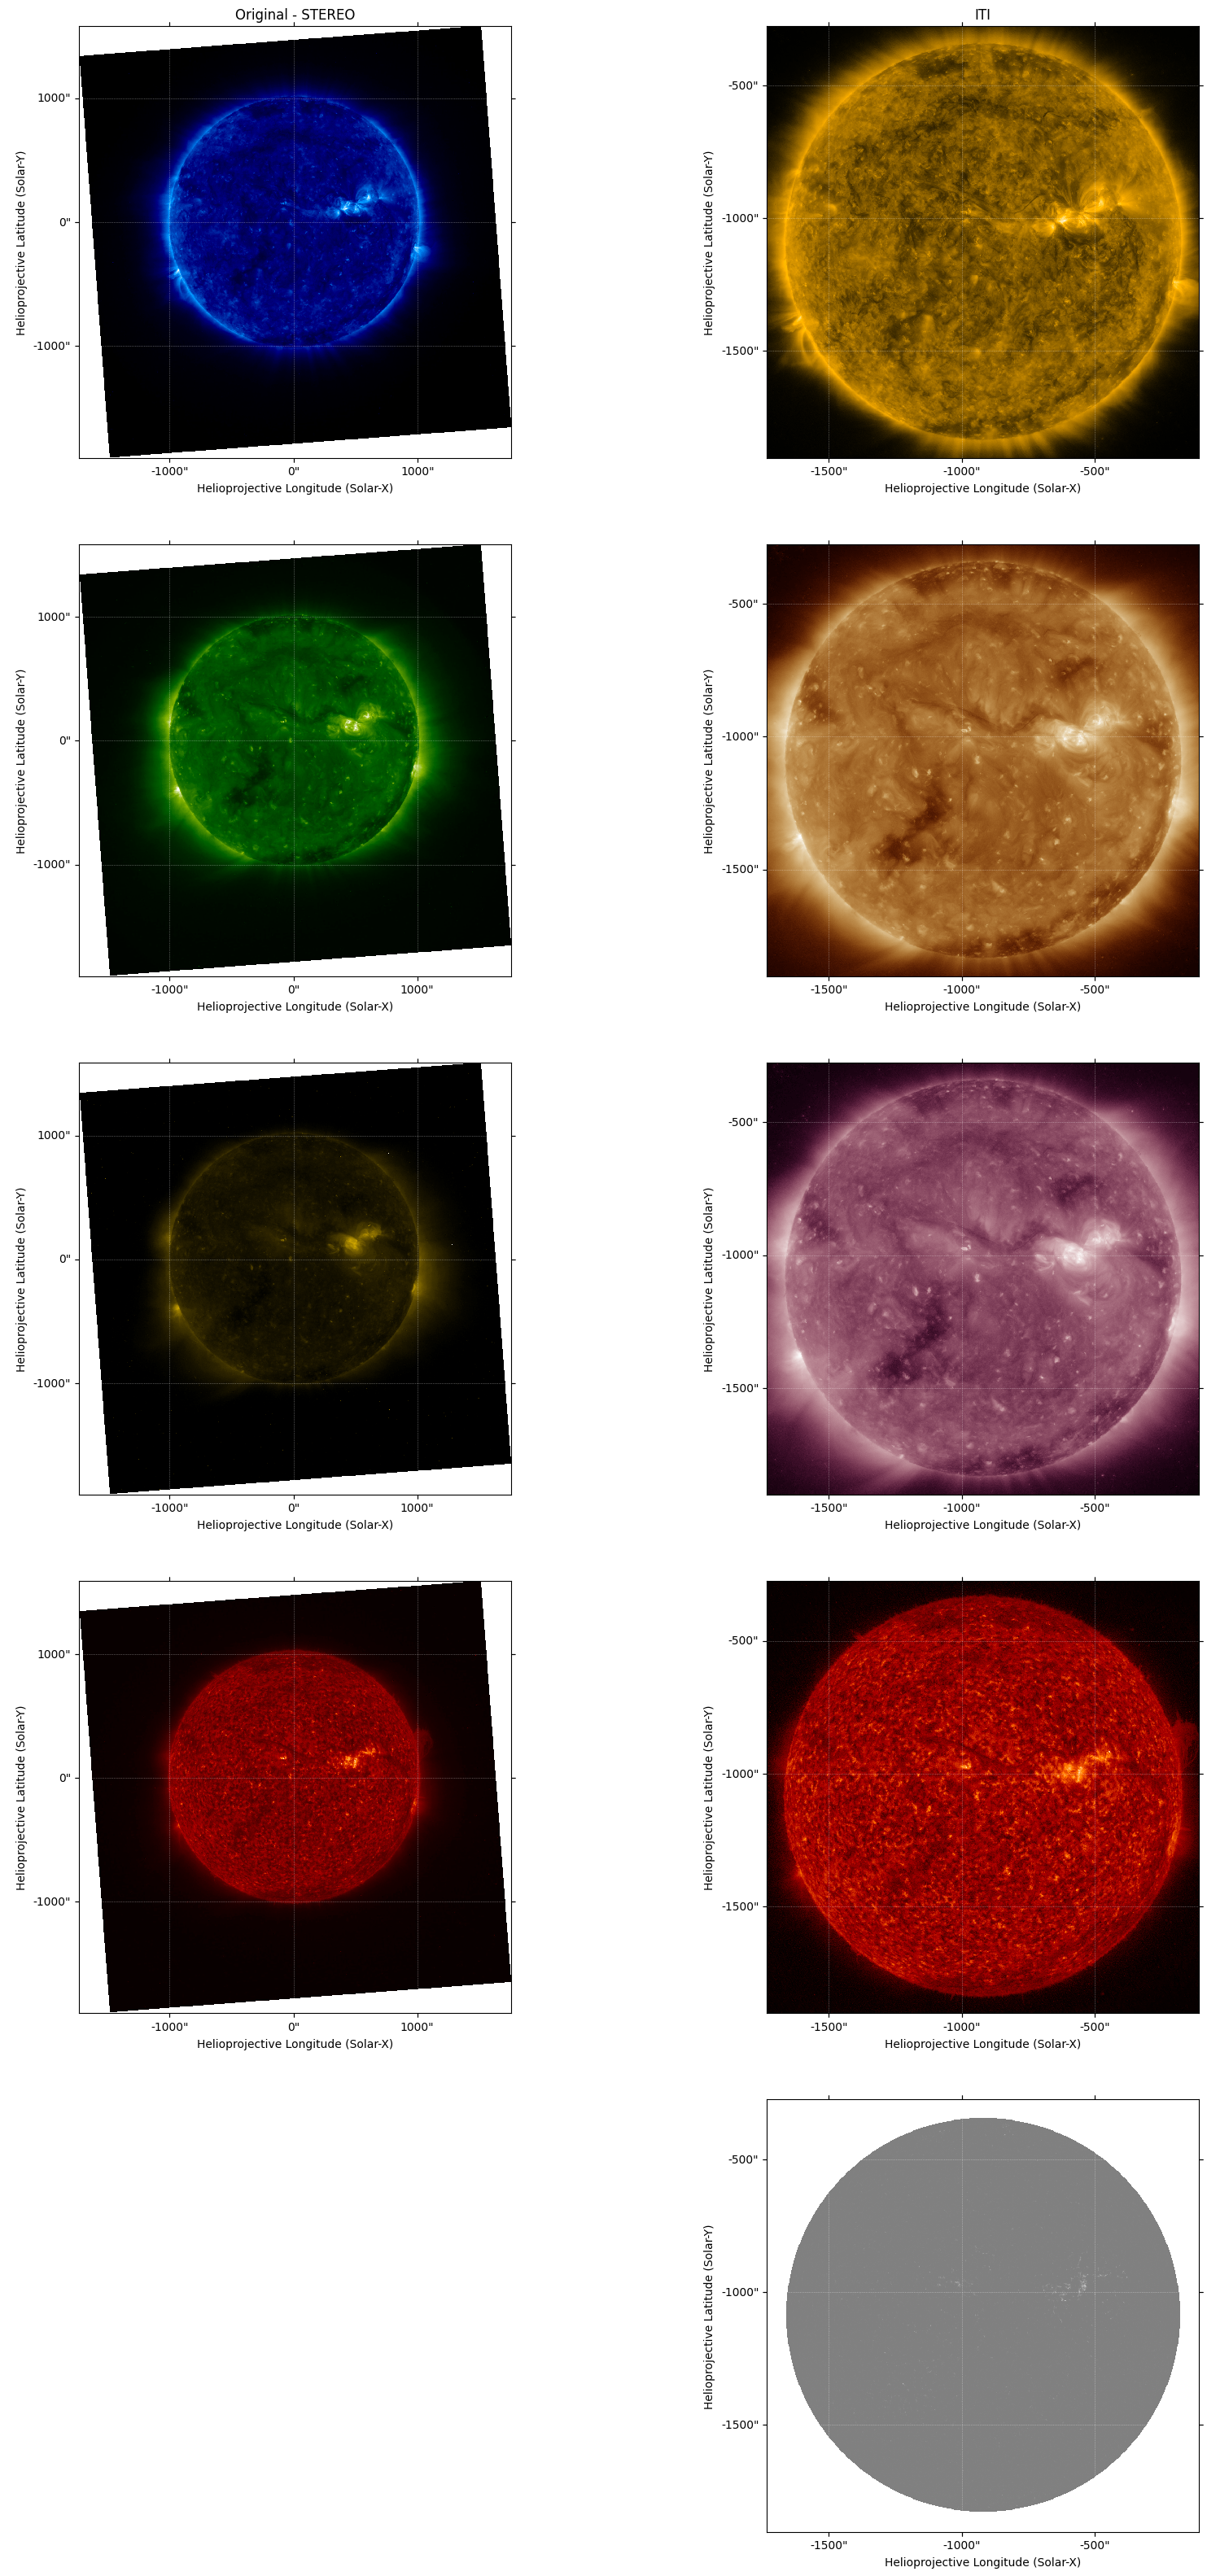

In [6]:
fig, axs = plt.subplots(5, 2, figsize=(20, 40), subplot_kw={'projection': stereo_maps[0]})
for i, (stereo_map, iti_map) in enumerate(zip(stereo_maps, iti_mag_maps)):
    stereo_map.plot(axes=axs[i,0])
    iti_map.plot(axes=axs[i,1])
iti_mag_maps[-1].plot(axes=axs[-1,1], vmin=-1000, vmax=1000)
axs[-1, 0].set_axis_off()
[ax.set_title('') for ax in np.ravel(axs)]
axs[0,0].set_title('Original - STEREO')
axs[0,1].set_title('ITI')
plt.show()